# Data Validation

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import folium

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [ ]:
# Leer el archivo CSV
data = pd.read_csv('/content/Pump_initial_data.csv')

In [ ]:
#Opcion de carga local
# pumps_df=pd.read_csv("./data/Pump_initial_data.csv", parse_dates=['date_recorded'], date_format='%d/%m/%Y')

In [ ]:
data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,14/03/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,06/03/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,25/02/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,28/01/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,13/07/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [ ]:
data.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

## 1. Status Group vs Permit

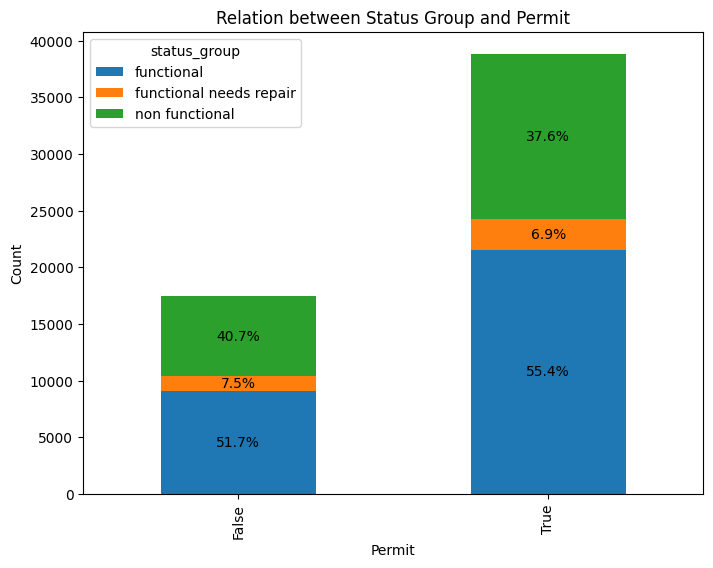

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

cross_tab = pd.crosstab(data['permit'], data['status_group'])
cross_tab.plot(kind='bar', stacked=True, figsize=(8, 6))
totals = cross_tab.sum(axis=1)

for i, total in enumerate(totals):
    bottom = 0
    for status in cross_tab.columns:
        height = cross_tab.iloc[i][status]
        percentage = f'{height / total:.1%}'
        plt.text(i, bottom + height / 2, percentage, ha='center', va='center')
        bottom += height

plt.title('Relation between Status Group and Permit')
plt.xlabel('Permit')
plt.ylabel('Count')
plt.show()

Cuando Permit == False, se ve que un porcentaje de los puntos de agua sin permiso son no funcionales (40.7%), lo que indica una posible relación entre la falta de permisos y el deterioro de las infraestructuras de agua. Aunque no haya tanta diferencia, los permisos podrían mejorar la longevidad y la funcionalidad de los puntos de agua.

## 2. Status Group vs Scheme Management

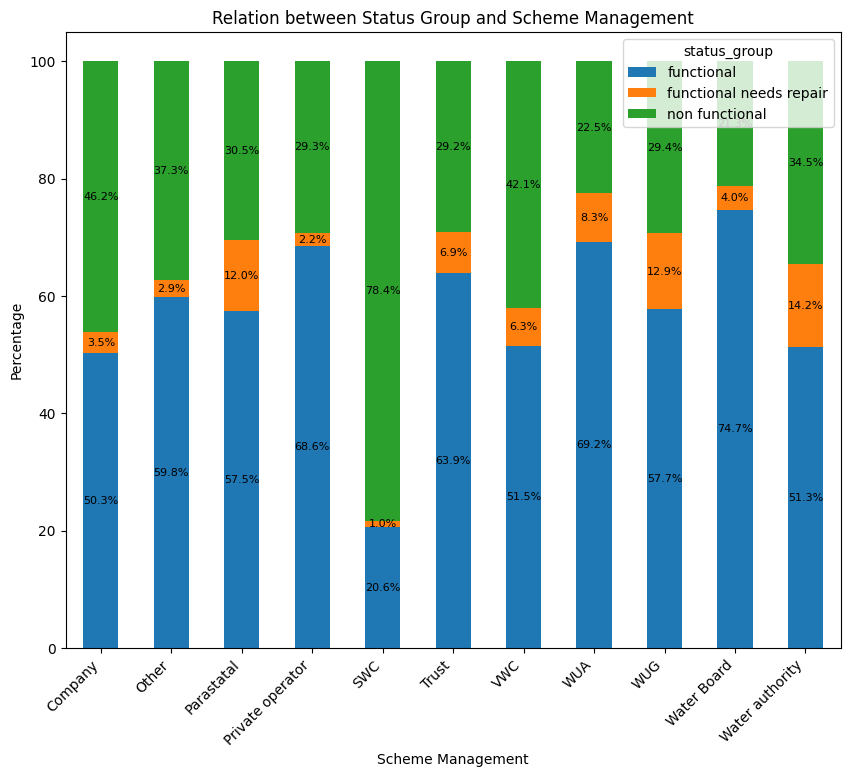

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

cross_tab_scheme = pd.crosstab(data['scheme_management'], data['status_group'])

cross_tab_scheme_percentage = cross_tab_scheme.div(cross_tab_scheme.sum(1), axis=0) * 100

ax = cross_tab_scheme_percentage.plot(kind='bar', stacked=True, figsize=(10, 8))

totals = cross_tab_scheme.sum(axis=1)

for i, total in enumerate(totals):
    bottom = 0
    for status in cross_tab_scheme.columns:
        height = cross_tab_scheme_percentage.iloc[i][status]
        if height > 0:
            percentage = f'{height:.1f}%'
            ax.text(i, bottom + height / 2, percentage, ha='center', va='center', fontsize=8)
        bottom += height

plt.xticks(rotation=45, ha='right')
plt.title('Relation between Status Group and Scheme Management')
plt.xlabel('Scheme Management')
plt.ylabel('Percentage')
plt.show()



*   Water User Associations (WUA) y Water Boards tienen la mayor proporción de puntos funcionales (69.2% y 74.7% respectivamente), lo que indica una gestión más efectiva
*   Private operators y Trust también tienen buenas tasas de funcionalidad (68.6% y 63.9%).
* Parastatal y Other gestionan puntos con una mayor proporción de fallos, con un alto porcentaje de puntos no funcionales (30.5% y 37.3%).


Un parastatal es una empresa o entidad parcialmente controlada por el gobierno, pero que opera de manera independiente. Estas organizaciones a menudo brindan servicios públicos o esenciales, como energía, agua, o transporte, y aunque pueden estar vinculadas al gobierno, suelen operar con una estructura corporativa.



## 3. Status Group vs Construction Year

<ipython-input-7-aa3f1a2272e4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['decade'] = (filtered_data['construction_year'] // 10) * 10


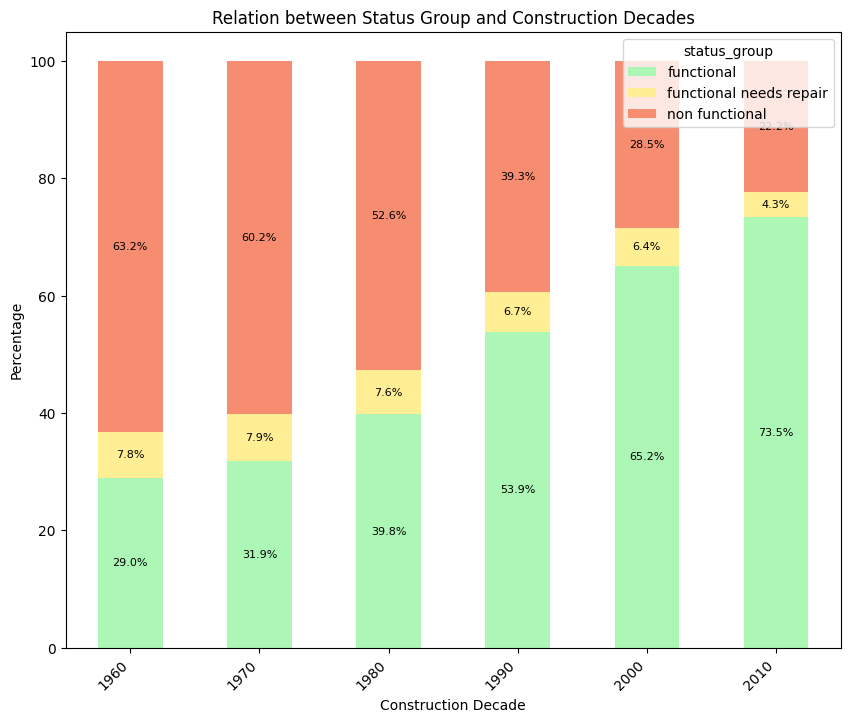

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filtros y creación de la tabla cruzada
filtered_data = data[(data['construction_year'] != 0) & (data['construction_year'] >= 1960) & (data['construction_year'] <= 2013)]
filtered_data['decade'] = (filtered_data['construction_year'] // 10) * 10

cross_tab_decade = pd.crosstab(filtered_data['decade'], filtered_data['status_group'])
cross_tab_decade_percentage = cross_tab_decade.div(cross_tab_decade.sum(1), axis=0) * 100

# Colores personalizados
custom_colors = {
    "functional": "#adf7b6",   # Verde pastel
    "functional needs repair": "#ffee93", # Amarillo pastel
    "non functional": "#f68c70"  # Rojo pastel
}

# Crear el gráfico apilado con colores personalizados
ax = cross_tab_decade_percentage.plot(kind='bar', stacked=True, figsize=(10, 8),
                                      color=[custom_colors['functional'], custom_colors['functional needs repair'], custom_colors['non functional']])

# Añadir porcentajes en las barras
totals = cross_tab_decade.sum(axis=1)

for i, total in enumerate(totals):
    bottom = 0
    for status in cross_tab_decade.columns:
        height = cross_tab_decade_percentage.iloc[i][status]
        if height > 0:
            percentage = f'{height:.1f}%'
            ax.text(i, bottom + height / 2, percentage, ha='center', va='center', fontsize=8)
        bottom += height

# Personalizar la apariencia del gráfico
plt.xticks(rotation=45, ha='right')
plt.title('Relation between Status Group and Construction Decades')
plt.xlabel('Construction Decade')
plt.ylabel('Percentage')
plt.show()

Las infraestructuras más recientes (décadas de 2000 y 2010) muestran una mayor funcionalidad, con más del 65% de puntos de agua en buen estado, mientras que las construcciones de las décadas de 1960 y 1970 tienen una proporción considerable de puntos no funcionales, superior al 60%.

Esto sugiere una mejora en la gestión y mantenimiento de las bombas construidas en los últimos años.


## 4. Status Group vs Extraction Type Class

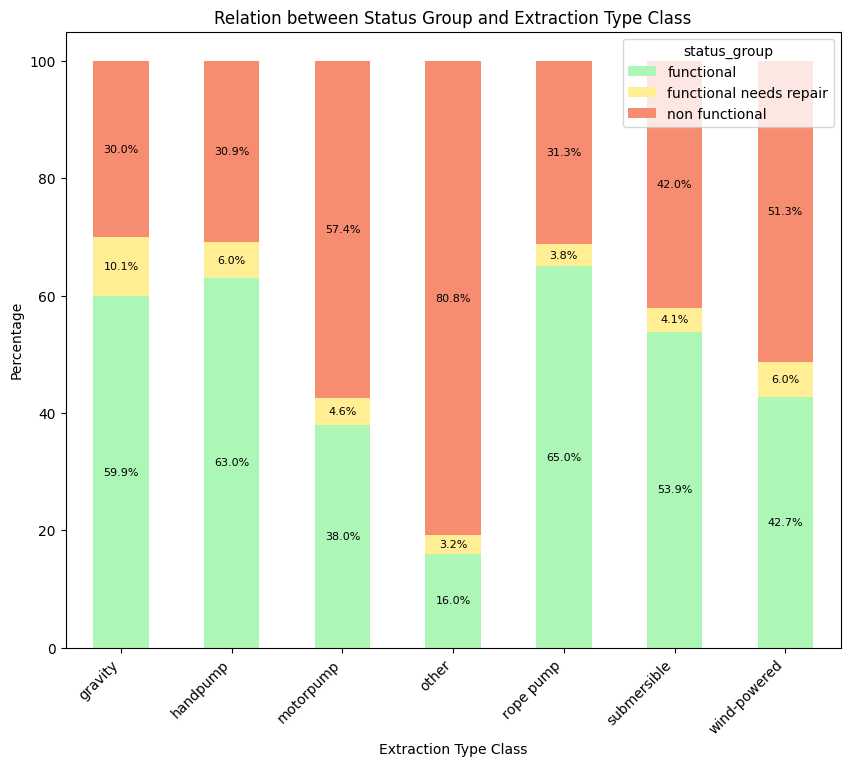

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Crear la tabla cruzada
cross_tab_extraction = pd.crosstab(data['extraction_type_class'], data['status_group'])
cross_tab_extraction_percentage = cross_tab_extraction.div(cross_tab_extraction.sum(1), axis=0) * 100

# Colores personalizados
custom_colors = {
    "functional": "#adf7b6",   # Verde pastel
    "functional needs repair": "#ffee93", # Amarillo pastel
    "non functional": "#f68c70"  # Rojo pastel
}

# Crear el gráfico apilado con colores personalizados
ax = cross_tab_extraction_percentage.plot(kind='bar', stacked=True, figsize=(10, 8),
                                          color=[custom_colors['functional'], custom_colors['functional needs repair'], custom_colors['non functional']])

# Añadir porcentajes en las barras
totals = cross_tab_extraction.sum(axis=1)

for i, total in enumerate(totals):
    bottom = 0
    for status in cross_tab_extraction.columns:
        height = cross_tab_extraction_percentage.iloc[i][status]
        if height > 0:
            percentage = f'{height:.1f}%'
            ax.text(i, bottom + height / 2, percentage, ha='center', va='center', fontsize=8)
        bottom += height

# Personalizar la apariencia del gráfico
plt.xticks(rotation=45, ha='right')
plt.title('Relation between Status Group and Extraction Type Class')
plt.xlabel('Extraction Type Class')
plt.ylabel('Percentage')
plt.show()

1. Gravity: Utiliza la gravedad para mover el agua desde una fuente más alta sin necesidad de bombeo.
2. Handpump: Bombas manuales que requieren esfuerzo humano para extraer el agua.
3. Motorpump: Bombas impulsadas por un motor, generalmente a combustible o electricidad.
4. Rope pump: Sistema de polea simple con una cuerda y pistones para extraer agua.
5. Submersible: Bombas sumergidas bajo el agua, eficientes para pozos profundos.
6. Wind-powered: Utiliza energía eólica para extraer agua, especialmente en áreas rurales.

**Resumen:**

* Gravity y handpumps son sistemas confiables, con más del 59% de funcionalidad, debido a su simplicidad y bajo mantenimiento.
* Motorpump y wind-powered tienen las tasas más altas de fallos, lo que sugiere que requieren más mantenimiento o presentan desafíos técnicos.
* Rope pumps y submersible pumps tienen tasas de funcionalidad elevadas, lo que indica que son opciones más efectivas para pozos profundos o áreas con suministro de agua complicado.

La complejidad tecnológica parece correlacionarse con mayores tasas de fallos.


## 5. Status Group vs Management Group

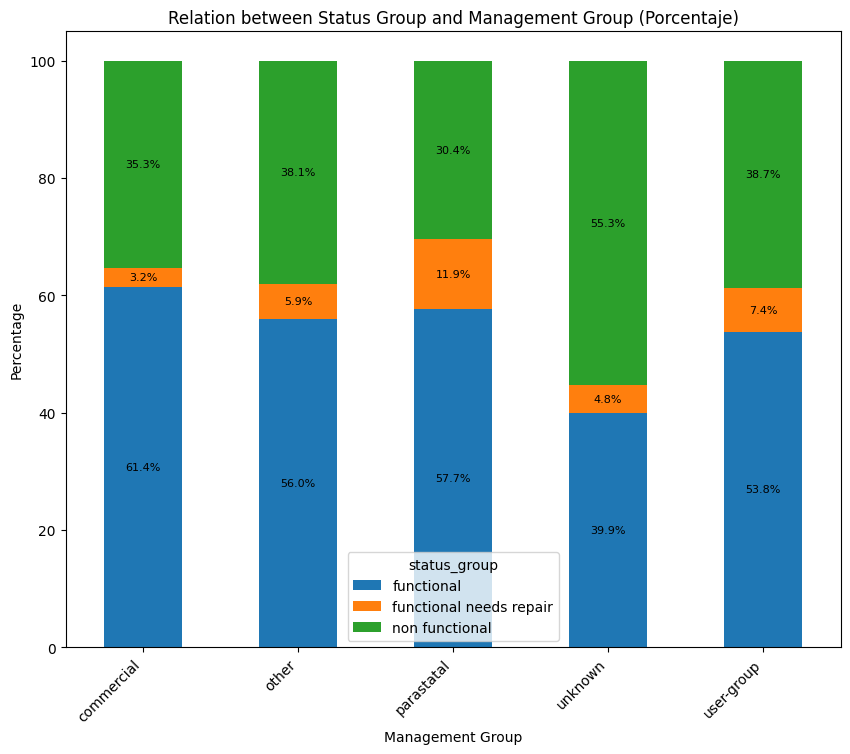

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

cross_tab_management = pd.crosstab(data['management_group'], data['status_group'])

cross_tab_management_percentage = cross_tab_management.div(cross_tab_management.sum(1), axis=0) * 100

ax = cross_tab_management_percentage.plot(kind='bar', stacked=True, figsize=(10, 8))

totals = cross_tab_management.sum(axis=1)

for i, total in enumerate(totals):
    bottom = 0
    for status in cross_tab_management.columns:
        height = cross_tab_management_percentage.iloc[i][status]
        if height > 0:
            percentage = f'{height:.1f}%'
            ax.text(i, bottom + height / 2, percentage, ha='center', va='center', fontsize=8)
        bottom += height

plt.xticks(rotation=45, ha='right')
plt.title('Relation between Status Group and Management Group (Porcentaje)')
plt.xlabel('Management Group')
plt.ylabel('Percentage')
plt.show()

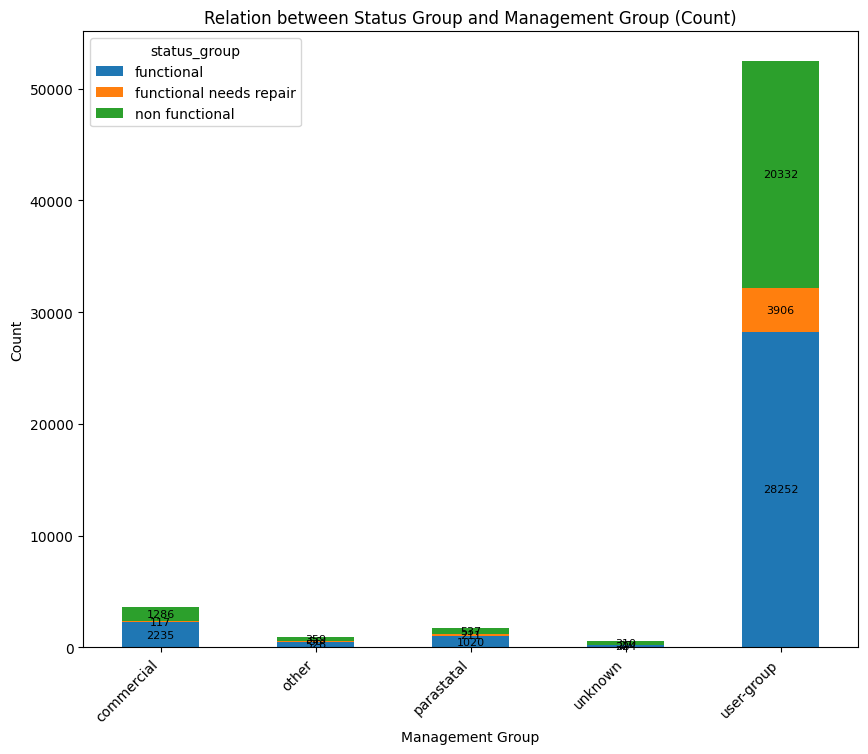

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Crear una tabla de contingencia con los conteos
cross_tab_management = pd.crosstab(data['management_group'], data['status_group'])

# Graficar las barras apiladas con los conteos
ax = cross_tab_management.plot(kind='bar', stacked=True, figsize=(10, 8))

# Añadir los totales dentro de las barras
for i, total in enumerate(cross_tab_management.sum(axis=1)):
    bottom = 0
    for status in cross_tab_management.columns:
        height = cross_tab_management.iloc[i][status]
        if height > 0:
            percentage = f'{height}'
            ax.text(i, bottom + height / 2, percentage, ha='center', va='center', fontsize=8)
        bottom += height

plt.xticks(rotation=45, ha='right')
plt.title('Relation between Status Group and Management Group (Count)')
plt.xlabel('Management Group')
plt.ylabel('Count')
plt.show()

Al revisar en (%) se que que los puntos de agua gestionados por grupos comerciales y parastatales son los más funcionales, mientras que los gestionados por grupos de usuarios y desconocidos tienen más problemas de funcionalidad.

Pero al revisar por count se ve que esto se puede dat por el total de registros por cada management group

Que son grupos comerciales?

## 6. Payment Type vs Scheme Management

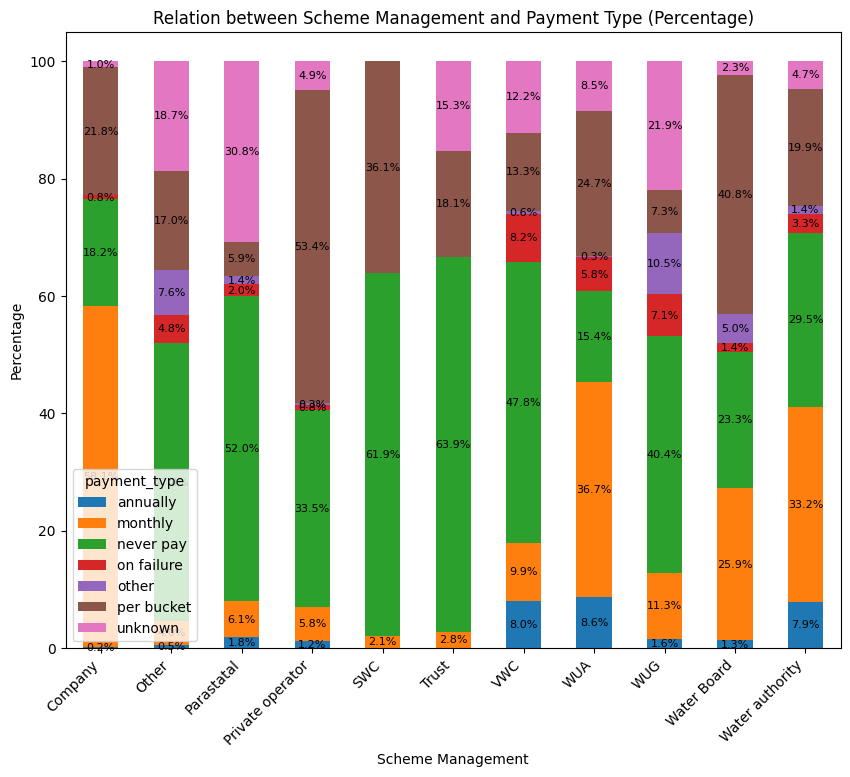

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

cross_tab_scheme_payment = pd.crosstab(data['scheme_management'], data['payment_type'])

cross_tab_scheme_payment_percentage = cross_tab_scheme_payment.div(cross_tab_scheme_payment.sum(1), axis=0) * 100

ax = cross_tab_scheme_payment_percentage.plot(kind='bar', stacked=True, figsize=(10, 8))

totals = cross_tab_scheme_payment.sum(axis=1)

for i, total in enumerate(totals):
    bottom = 0
    for payment in cross_tab_scheme_payment.columns:
        height = cross_tab_scheme_payment_percentage.iloc[i][payment]
        if height > 0:
            percentage = f'{height:.1f}%'
            ax.text(i, bottom + height / 2, percentage, ha='center', va='center', fontsize=8)
        bottom += height

plt.xticks(rotation=45, ha='right')
plt.title('Relation between Scheme Management and Payment Type (Percentage)')
plt.xlabel('Scheme Management')
plt.ylabel('Percentage')
plt.show()



*   SWC: Sanitation and Water Committee
*   VWC: Village Water Committee
*   WUG: Water User Group
*   WUA: Water User Association



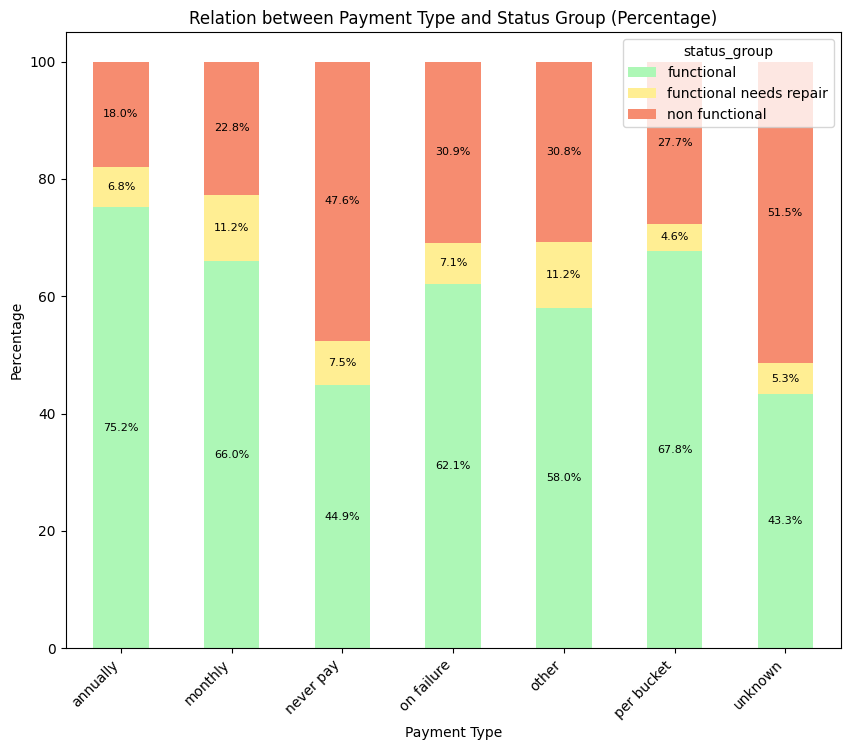

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

cross_tab_payment_status = pd.crosstab(data['payment_type'], data['status_group'])
cross_tab_payment_status_percentage = cross_tab_payment_status.div(cross_tab_payment_status.sum(1), axis=0) * 100

custom_colors = {
    "functional": "#adf7b6",
    "functional needs repair": "#ffee93",
    "non functional": "#f68c70"
}

ax = cross_tab_payment_status_percentage.plot(kind='bar', stacked=True, figsize=(10, 8),
                                              color=[custom_colors['functional'], custom_colors['functional needs repair'], custom_colors['non functional']])

totals = cross_tab_payment_status.sum(axis=1)

for i, total in enumerate(totals):
    bottom = 0
    for status in cross_tab_payment_status.columns:
        height = cross_tab_payment_status_percentage.iloc[i][status]
        if height > 0:
            percentage = f'{height:.1f}%'
            ax.text(i, bottom + height / 2, percentage, ha='center', va='center', fontsize=8)
        bottom += height

plt.xticks(rotation=45, ha='right')
plt.title('Relation between Payment Type and Status Group (Percentage)')
plt.xlabel('Payment Type')
plt.ylabel('Percentage')
plt.show()

Con los metodos de pago annually y per bucket se tienen las mayores proporciones de puntos de agua funcionales (75.2% y 67.8%, respectivamente).

Por otro lado, los puntos de agua con never pay y unknown tienen los mayores porcentajes de fallos (47.6% y 51.5%, respectivamente).

Los sistemas donde se realiza un pago regular están mejor mantenidos, mientras que los puntos de agua sin estructura de pago tienden a ser menos funcionales.

## Other Validations

In [ ]:
data['source'].value_counts()

,count
source,
spring,17021
shallow well,16824
machine dbh,11075
river,9612
rainwater harvesting,2295
hand dtw,874
lake,765
dam,656
other,212


In [ ]:
data['waterpoint_type'].value_counts()

,count
waterpoint_type,
communal standpipe,28522
hand pump,17488
other,6380
communal standpipe multiple,6103
improved spring,784
cattle trough,116
dam,7


In [ ]:
data.shape

(59400, 41)

In [ ]:
data.dtypes

,0
id,int64
amount_tsh,float64
date_recorded,object
funder,object
gps_height,int64
installer,object
longitude,float64
latitude,float64
wpt_name,object
num_private,int64


In [ ]:
scheme_status_count = data.groupby(['scheme_management', 'status_group']).size().reset_index(name='count')
total_by_scheme = data.groupby('scheme_management').size().reset_index(name='total_count')
scheme_status_count = scheme_status_count.merge(total_by_scheme, on='scheme_management')
scheme_status_count['percentage'] = (scheme_status_count['count'] / scheme_status_count['total_count']) * 100

print(scheme_status_count)

   scheme_management             status_group  count  total_count  percentage
0            Company               functional    534         1061   50.329877
1            Company  functional needs repair     37         1061    3.487276
2            Company           non functional    490         1061   46.182846
3              Other               functional    458          766   59.791123
4              Other  functional needs repair     22          766    2.872063
5              Other           non functional    286          766   37.336815
6         Parastatal               functional    966         1680   57.500000
7         Parastatal  functional needs repair    202         1680   12.023810
8         Parastatal           non functional    512         1680   30.476190
9   Private operator               functional    729         1063   68.579492
10  Private operator  functional needs repair     23         1063    2.163688
11  Private operator           non functional    311         106

In [ ]:
data.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

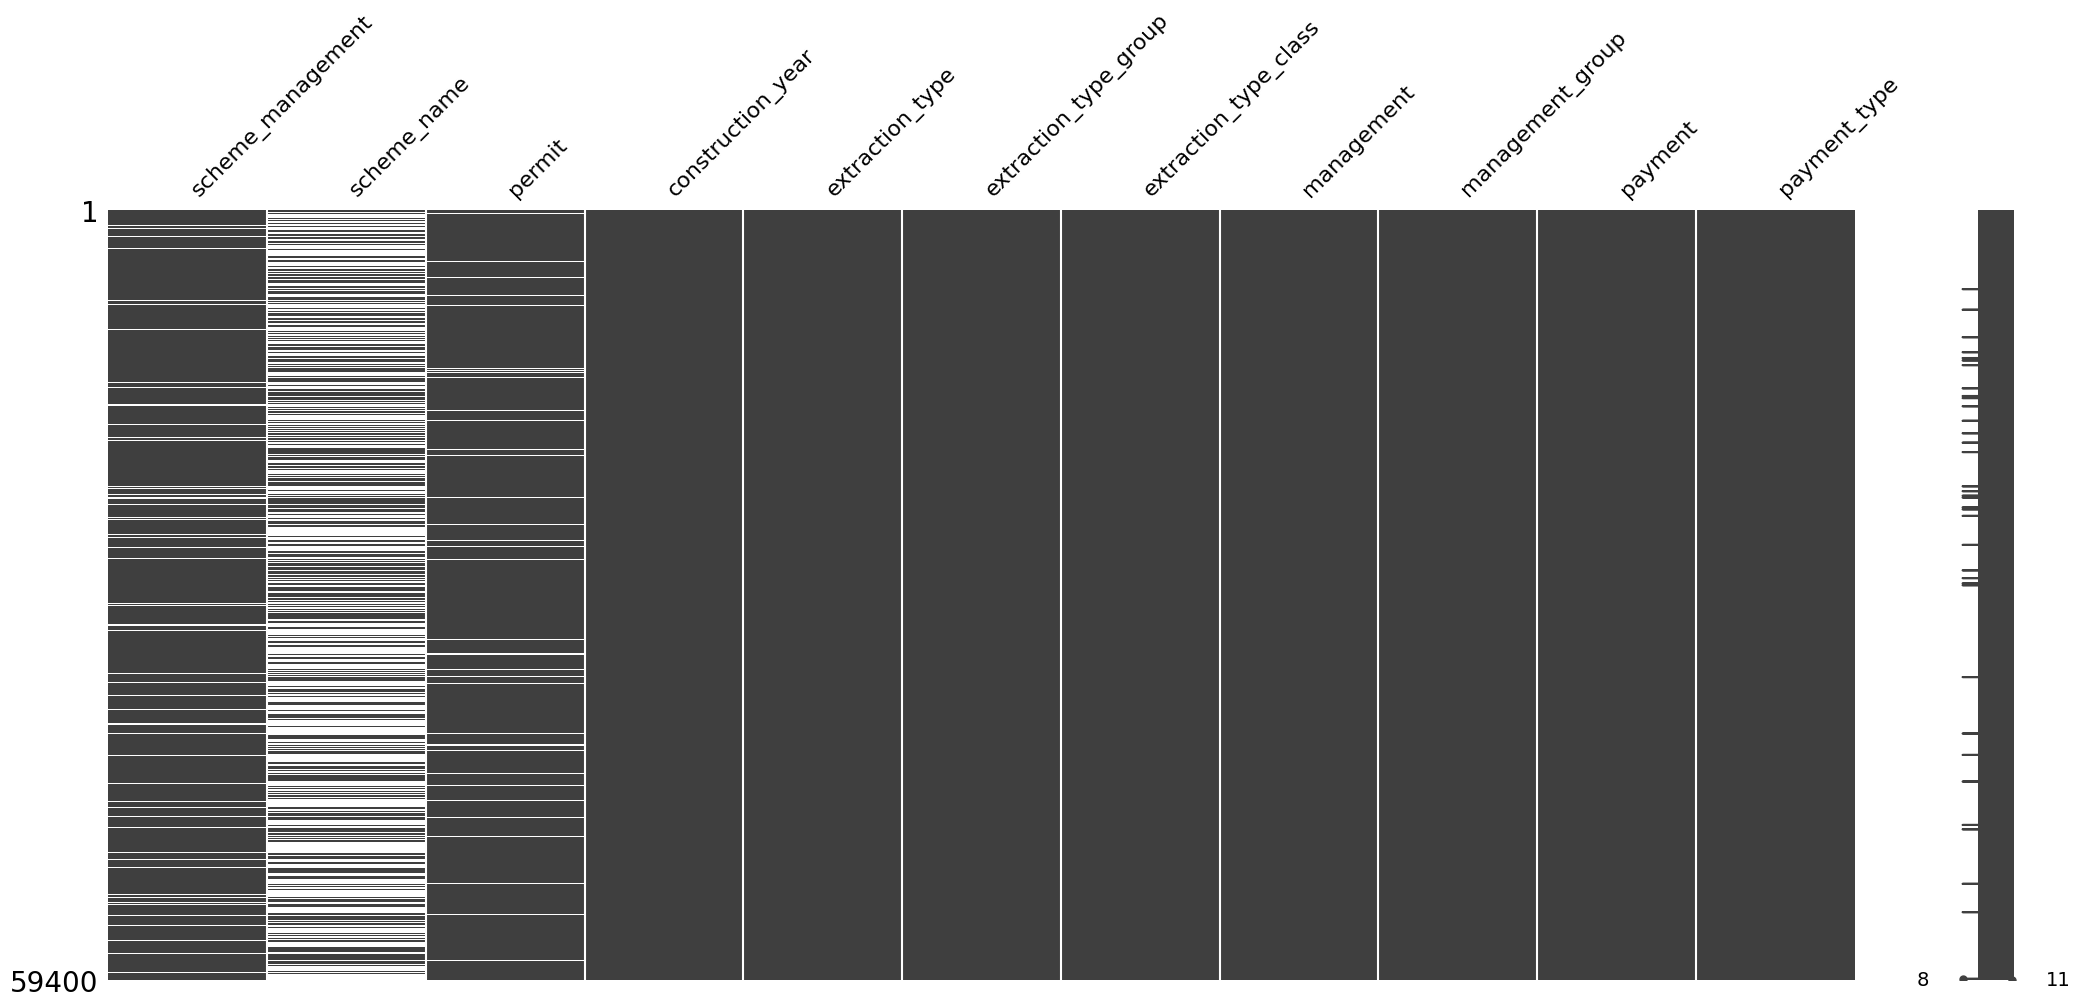

In [ ]:
import missingno as msno

columns_rev = ['scheme_management', 'scheme_name', 'permit',
                       'construction_year', 'extraction_type',
                       'extraction_type_group', 'extraction_type_class',
                       'management', 'management_group', 'payment', 'payment_type']

filtered_data = data[columns_rev]

msno.matrix(filtered_data)
plt.show()

In [ ]:
nulls_por_columna = filtered_data.isnull().sum()
porcentaje_nulos_por_columna = (filtered_data.isnull().mean()) * 100

nulos_y_porcentaje = pd.DataFrame({
    'Número de Nulos': nulls_por_columna,
    'Porcentaje de Nulos (%)': porcentaje_nulos_por_columna
})

nulos_y_porcentaje

,Número de Nulos,Porcentaje de Nulos (%)
scheme_management,3878,6.528620
scheme_name,28810,48.501684
permit,3056,5.144781
construction_year,0,0.000000
extraction_type,0,0.000000
extraction_type_group,0,0.000000
extraction_type_class,0,0.000000
management,0,0.000000
management_group,0,0.000000
payment,0,0.000000


In [ ]:
filtered_data.head(10)

,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type
0,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually
1,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay
2,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket
3,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay
4,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay
5,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket
6,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay
7,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown
8,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay
9,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay


In [ ]:
filtered_data['permit'].value_counts(normalize=True, dropna=False)

,proportion
permit,
True,0.654074
False,0.294478
NaN,0.051448


In [ ]:
filtered_data['construction_year'].value_counts().sort_index()

,count
construction_year,
0,20709
1960,102
1961,21
1962,30
1963,85
1964,40
1965,19
1966,17
1967,88


In [ ]:
construction_year_zero_count = (filtered_data['construction_year'] == 0).sum()

total_records = len(filtered_data)
construction_year_zero_percentage = (construction_year_zero_count / total_records) * 100

print(f"Registros con construction_year = 0: {construction_year_zero_count}")
print(f"Porcentaje de registros con construction_year = 0: {construction_year_zero_percentage:.2f}%")

Registros con construction_year = 0: 20709
Porcentaje de registros con construction_year = 0: 34.86%


In [ ]:
filtered_data['scheme_management'].isnull().sum()

3878

In [ ]:
# VWC village water committee
# WUGs Water User Groups
filtered_data['management_group'].value_counts()

,count
management_group,
user-group,52490
commercial,3638
parastatal,1768
other,943
unknown,561


In [ ]:
# VWC village water committee
# WUGs Water User Groups
filtered_data['scheme_management'].value_counts()

,count
scheme_management,
VWC,36793
WUG,5206
Water authority,3153
WUA,2883
Water Board,2748
Parastatal,1680
Private operator,1063
Company,1061
Other,766


In [ ]:
filtered_data['management'].value_counts()

,count
management,
vwc,40507
wug,6515
water board,2933
wua,2535
private operator,1971
parastatal,1768
water authority,904
other,844
company,685


In [ ]:
filtered_data.columns

Index(['scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type'],
      dtype='object')

In [ ]:
filtered_data['extraction_type'].value_counts()

,count
extraction_type,
gravity,26780
nira/tanira,8154
other,6430
submersible,4764
swn 80,3670
mono,2865
india mark ii,2400
afridev,1770
ksb,1415


In [ ]:
filtered_data['extraction_type_group'].value_counts()

,count
extraction_type_group,
gravity,26780
nira/tanira,8154
other,6430
submersible,6179
swn 80,3670
mono,2865
india mark ii,2400
afridev,1770
rope pump,451


In [ ]:
filtered_data['extraction_type_class'].value_counts()

,count
extraction_type_class,
gravity,26780
handpump,16456
other,6430
submersible,6179
motorpump,2987
rope pump,451
wind-powered,117


In [ ]:
filtered_data['payment'].value_counts()

,count
payment,
never pay,25348
pay per bucket,8985
pay monthly,8300
unknown,8157
pay when scheme fails,3914
pay annually,3642
other,1054


In [ ]:
filtered_data['payment_type'].value_counts()

,count
payment_type,
never pay,25348
per bucket,8985
monthly,8300
unknown,8157
on failure,3914
annually,3642
other,1054


## Data Cleaning

In [ ]:
import missingno as msno

In [ ]:
# Leer el archivo CSV
raw  = pd.read_csv('/content/Pump_initial_data.csv', parse_dates = ['date_recorded' ],  na_values = [0, '0'])

<ipython-input-31-b4986cab98e4>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  raw  = pd.read_csv('/content/Pump_initial_data.csv', parse_dates = ['date_recorded' ],  na_values = [0, '0'])


In [ ]:
raw.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572.0,6000.0,2011-03-14,Roman,1390.0,Roman,34.938093,-9.856322,none,NaN,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776.0,NaN,2013-03-06,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,NaN,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310.0,25.0,2013-02-25,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,NaN,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743.0,NaN,2013-01-28,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,NaN,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728.0,NaN,2011-07-13,Action In A,NaN,Artisan,31.130847,-1.825359,Shuleni,NaN,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [ ]:
print(len(raw))

59400


In [ ]:
raw.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [ ]:
missing = round((raw.isna().sum())/len(raw)*100,1)
missing = missing.sort_values(ascending = False)
missing.head(15)

,0
num_private,98.7
amount_tsh,70.1
scheme_name,48.5
population,36.0
construction_year,34.9
gps_height,34.4
installer,7.5
funder,7.4
scheme_management,6.5
public_meeting,5.6


<Axes: >

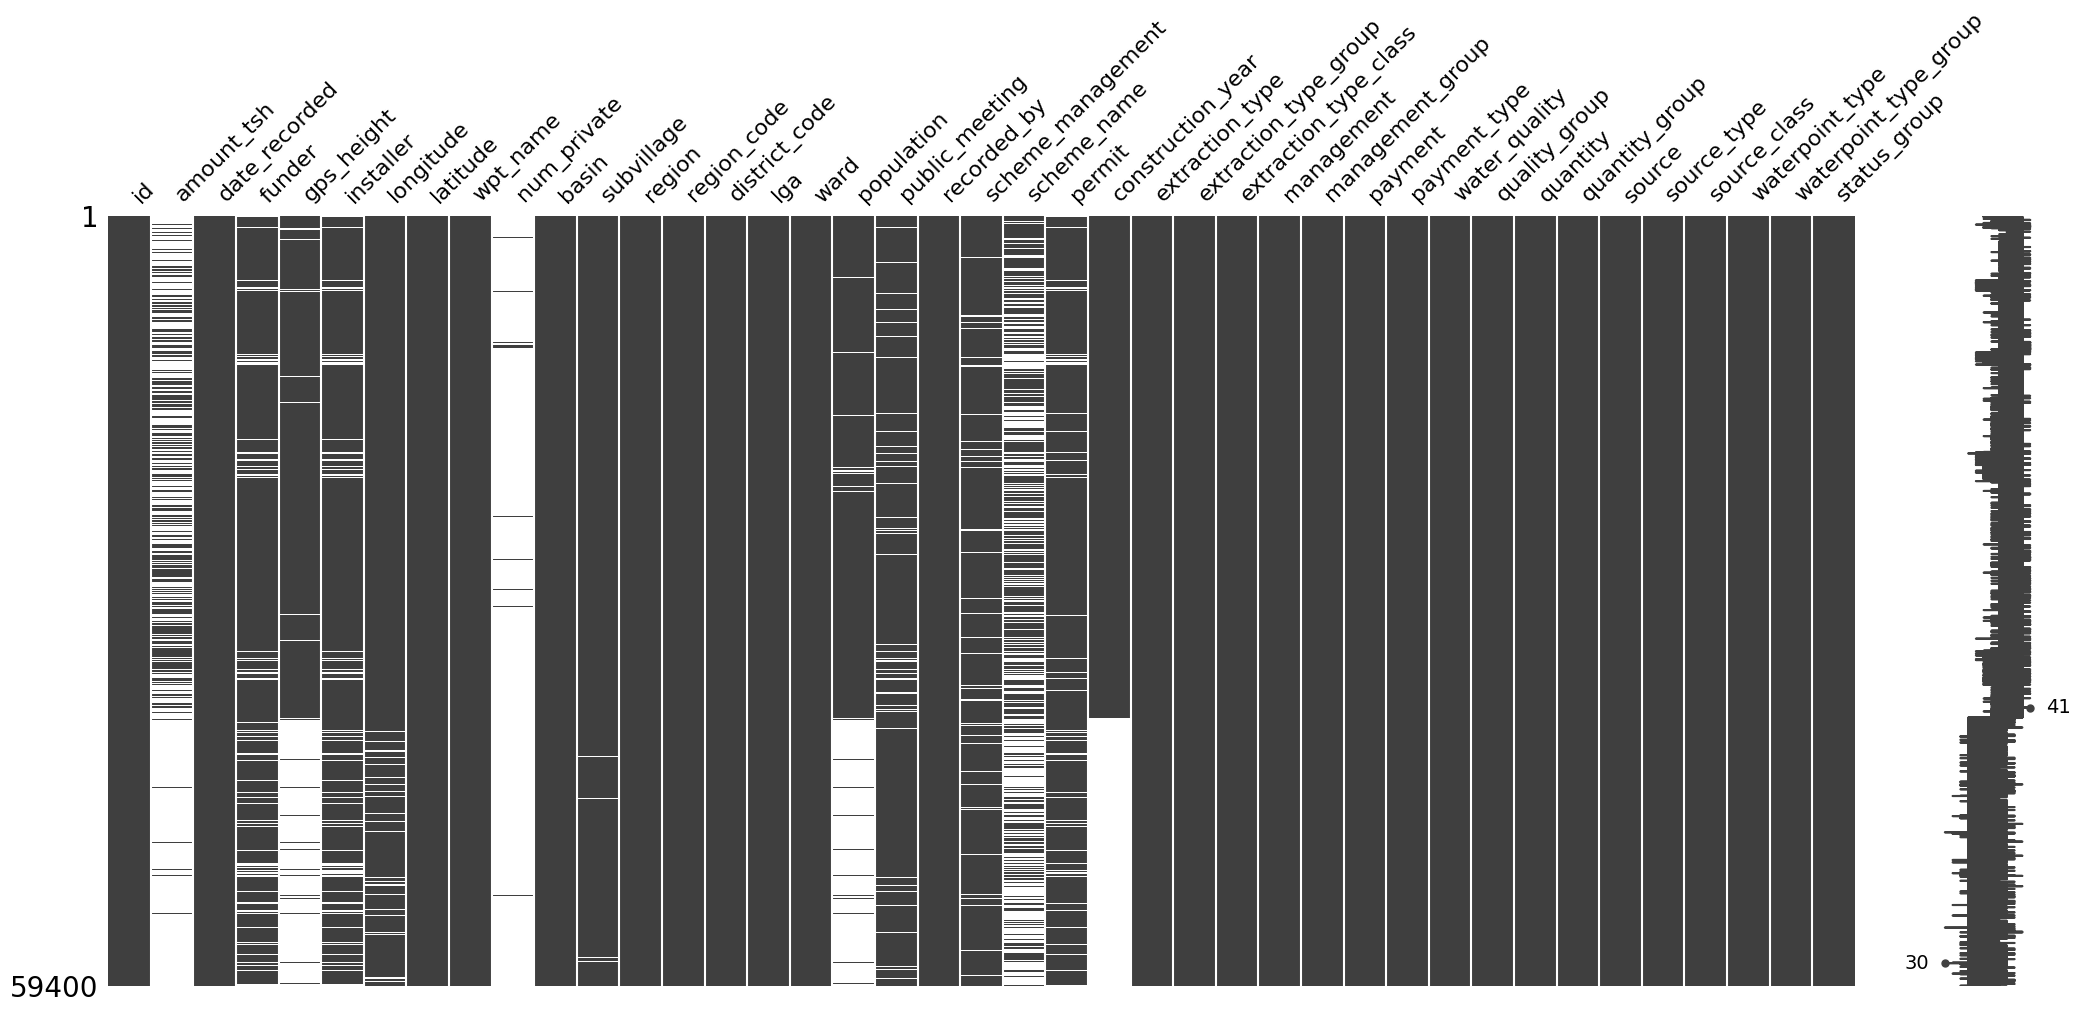

In [ ]:
#there is a clear relation between missing values in gps_heigt, population, construction year and to some degree longitude: data is not missing at random
sorted = raw.sort_values('construction_year')
msno.matrix(sorted)

<Axes: >

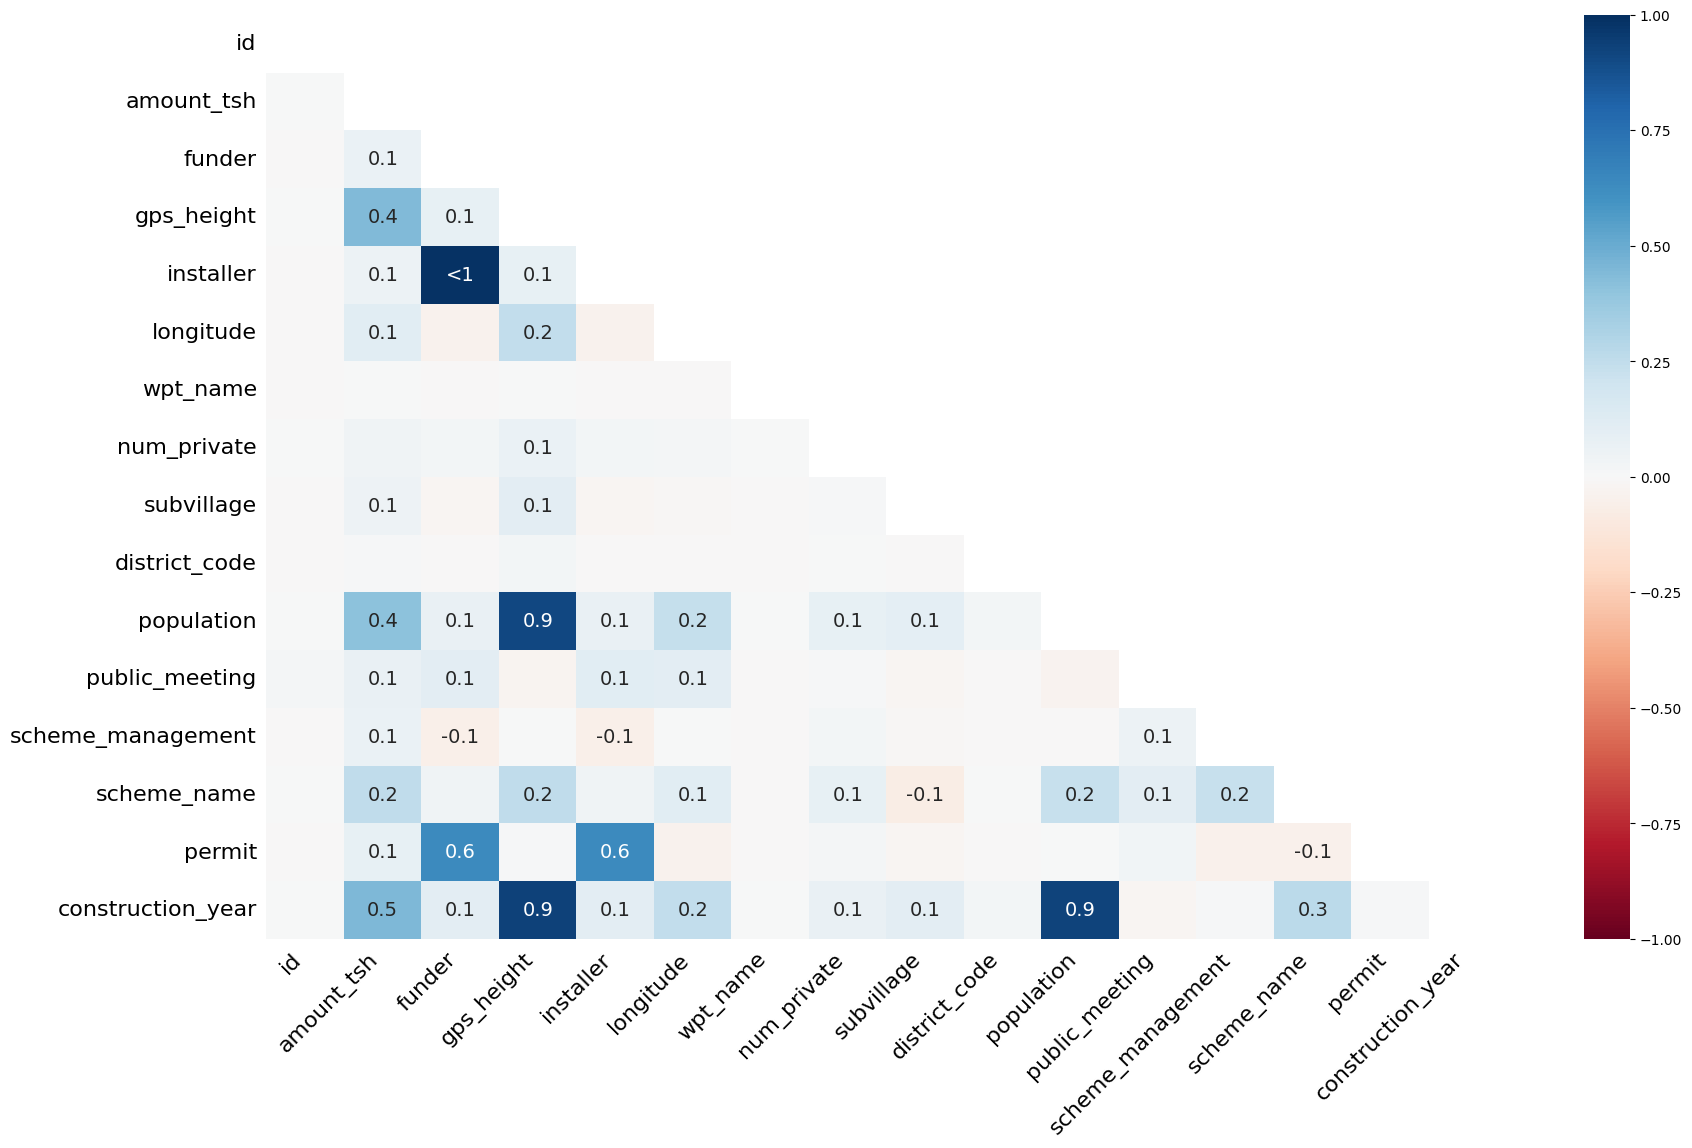

In [ ]:
#strong correlation in missingness
msno.heatmap(raw)

In [ ]:
raw['construction_year'].min(),  raw['construction_year'].max() , raw['construction_year'].mean()

(1960.0, 2013.0, 1996.8146855857951)

In [ ]:
mean_construction = raw.groupby('extraction_type_group')['construction_year'].mean().reset_index()
mean_construction

,extraction_type_group,construction_year
0,afridev,2002.316821
1,gravity,1995.965949
2,india mark ii,2001.308428
3,india mark iii,2004.126984
4,mono,1992.634541
5,nira/tanira,1999.421166
6,other,1993.136859
7,other handpump,2000.711790
8,other motorpump,2011.666667
9,rope pump,2005.810256


In [ ]:
mean_construction = raw.groupby('extraction_type_group')['construction_year'].mean().reset_index()
mean_construction  = mean_construction.rename(columns={"construction_year": "imputed_construction_year"})

raw = raw.merge(mean_construction, how =  'left', on =  'extraction_type_group')
raw['construction_year_imputed'] = np.where(raw['construction_year'].isna(), raw['imputed_construction_year'], raw['construction_year'] )

raw = raw.drop(['imputed_construction_year', 'construction_year'], axis=1)

In [ ]:
raw.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group', 'construction_year_imputed'],
      dtype='object')

In [ ]:
missing = round((raw.isna().sum())/len(raw)*100,1)
missing = missing.sort_values(ascending = False)
missing.head(15)

,0
num_private,98.7
amount_tsh,70.1
scheme_name,48.5
population,36.0
gps_height,34.4
installer,7.5
funder,7.4
scheme_management,6.5
public_meeting,5.6
permit,5.1


In [ ]:
check = raw.groupby([  'management_group', 'scheme_management' , 'management'])['id'].count().reset_index()
check = check.sort_values('management')
check.head(10)

,management_group,scheme_management,management,id
0,commercial,Company,company,674
21,commercial,WUG,company,4
19,commercial,WUA,company,1
15,commercial,VWC,company,2
7,commercial,Private operator,company,2
11,commercial,Trust,company,1
35,other,WUA,other,2
31,other,Private operator,other,4
33,other,VWC,other,49
36,other,WUG,other,15


In [ ]:
scheme_mode = raw.groupby(['management'])['scheme_management'].agg(pd.Series.mode).reset_index()
scheme_mode = scheme_mode.rename(columns={"scheme_management": "imputed_scheme_management"})
scheme_mode

,management,imputed_scheme_management
0,company,Company
1,other,Other
2,other - school,SWC
3,parastatal,Parastatal
4,private operator,Private operator
5,trust,Trust
6,unknown,VWC
7,vwc,VWC
8,water authority,Water authority
9,water board,Water Board


In [ ]:
raw = raw.merge(scheme_mode, how = 'left', on = [ 'management'])
raw['imputed_scheme__management'] = np.where(raw['scheme_management'].isna(), raw['imputed_scheme_management'], raw['scheme_management'])

raw = raw.drop(['scheme_management', 'imputed_scheme_management'],axis=1)

In [ ]:
raw.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,construction_year_imputed,imputed_scheme__management
0,69572.0,6000.0,2011-03-14,Roman,1390.0,Roman,34.938093,-9.856322,none,NaN,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,1999.000000,VWC
1,8776.0,NaN,2013-03-06,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,NaN,...,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2010.000000,Other
2,34310.0,25.0,2013-02-25,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,NaN,...,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,2009.000000,VWC
3,67743.0,NaN,2013-01-28,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,NaN,...,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,1986.000000,VWC
4,19728.0,NaN,2011-07-13,Action In A,NaN,Artisan,31.130847,-1.825359,Shuleni,NaN,...,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1995.965949,Other


# Lightgbm Implementation

In [38]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier
from lightgbm import early_stopping, log_evaluation
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from joblib import dump

In [2]:
# Leer el archivo CSV
pumps_df = pd.read_csv("/content/pumps_cleaned.csv")
pumps_df.shape

(59400, 17)

## 1. Validacion inicial de datos

In [3]:
pumps_df.head()

,id,longitude,latitude,region,extraction_type,management,payment_type,quality_group,quantity_group,source,waterpoint_type,status_group,population_imputed,altitud,construction_year_imputed,imputed_scheme__management,imputed_permit
0,69572,34.938093,-9.856322,Iringa,gravity,vwc,annually,good,enough,spring,communal standpipe,functional,109.0,1367.0,1999.0,VWC,False
1,8776,34.698766,-2.147466,Mara,gravity,wug,never pay,good,insufficient,rainwater harvesting,communal standpipe,functional,280.0,1440.0,2010.0,Other,True
2,34310,37.460664,-3.821329,Manyara,gravity,vwc,per bucket,good,enough,dam,communal standpipe multiple,functional,250.0,699.0,2009.0,VWC,True
3,67743,38.486161,-11.155298,Mtwara,submersible,vwc,never pay,good,dry,machine dbh,communal standpipe multiple,non functional,58.0,254.0,1986.0,VWC,True
4,19728,31.130847,-1.825359,Kagera,gravity,other,never pay,good,seasonal,rainwater harvesting,communal standpipe,functional,0.0,1675.0,0.0,Other,True


In [4]:
pumps_df['status_group'].unique()

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

In [5]:
# Ver información básica
print(pumps_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          59400 non-null  int64  
 1   longitude                   59400 non-null  float64
 2   latitude                    59400 non-null  float64
 3   region                      59400 non-null  object 
 4   extraction_type             59400 non-null  object 
 5   management                  59400 non-null  object 
 6   payment_type                59400 non-null  object 
 7   quality_group               59400 non-null  object 
 8   quantity_group              59400 non-null  object 
 9   source                      59400 non-null  object 
 10  waterpoint_type             59400 non-null  object 
 11  status_group                59400 non-null  object 
 12  population_imputed          59400 non-null  float64
 13  altitud                     594

In [6]:
print(pumps_df.describe())

                 id     longitude      latitude  population_imputed  \
count  59400.000000  59400.000000  5.940000e+04        59400.000000   
mean   37115.131768     34.077427 -5.706033e+00          179.909983   
std    21453.128371      6.567432  2.946019e+00          471.482176   
min        0.000000      0.000000 -1.164944e+01            0.000000   
25%    18519.750000     33.090347 -8.540621e+00            0.000000   
50%    37061.500000     34.908743 -5.021597e+00           25.000000   
75%    55656.500000     37.178387 -3.326156e+00          215.000000   
max    74247.000000     40.345193 -2.000000e-08        30500.000000   

            altitud  construction_year_imputed  
count  59400.000000               59400.000000  
mean     914.638788                1300.652475  
std      634.561508                 951.620547  
min      -90.000000                   0.000000  
25%      276.000000                   0.000000  
50%     1123.000000                1986.000000  
75%     1385.0000

In [7]:
# Comprobar valores únicos en la variable objetivo
print(pumps_df['status_group'].value_counts())

status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: count, dtype: int64


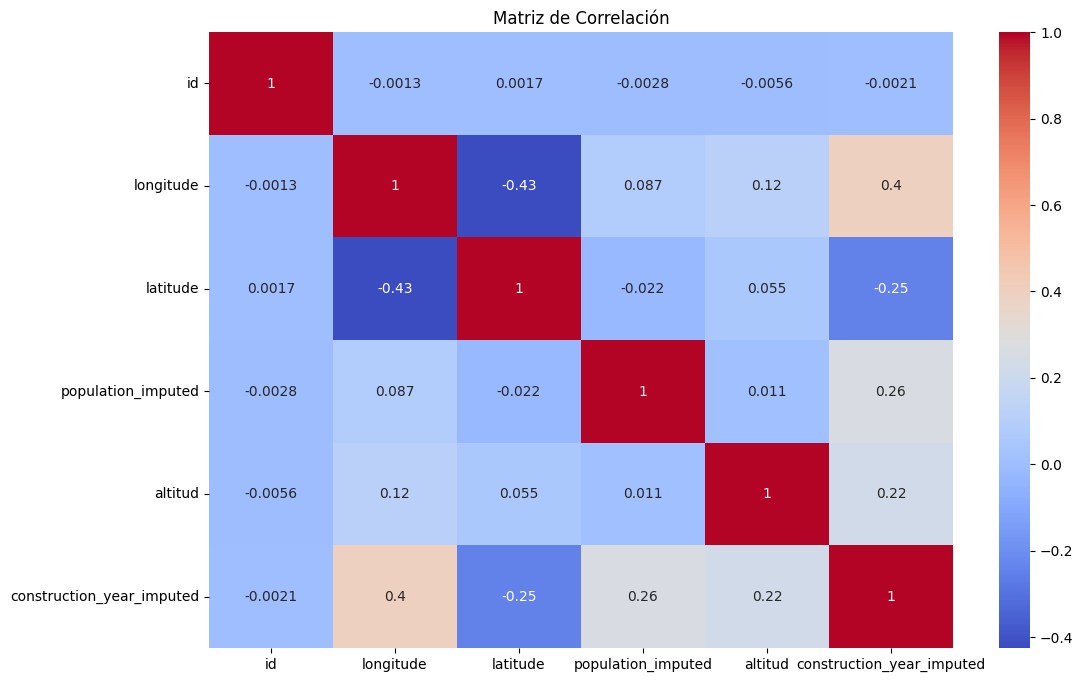

In [8]:
# Matriz de correlación
numerical_features = pumps_df.select_dtypes(include=[np.number])
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

## 2. Preparacion de los datos

In [9]:
# Codificar la variable objetivo
le = LabelEncoder()
pumps_df['status_group'] = le.fit_transform(pumps_df['status_group'])

In [10]:
# Dividir características y la variable objetivo
X = pumps_df.drop(columns=['status_group'])
y = pumps_df['status_group']

In [11]:
# Codificar variables categóricas
X = pd.get_dummies(X, drop_first=True)

In [12]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
print(f"Conjunto de entrenamiento: {X_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}")

Conjunto de entrenamiento: (41580, 92)
Conjunto de prueba: (17820, 92)


## 3. Entrenamiento del modelo LightGBM

In [14]:
import lightgbm
print(lightgbm.__version__)

4.5.0


In [15]:
# Crear los datos LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [16]:
# Crear y entrenar el modelo con validación
model = LGBMClassifier(
    objective='multiclass',
    num_class=len(le.classes_),
    learning_rate=0.1,
    num_leaves=31,
    max_depth=-1,
    metric='multi_logloss',
    verbosity=-1,
    n_estimators=100
)

In [17]:
# Entrenamiento con validación y early stopping
model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='multi_logloss',
    callbacks=[early_stopping(stopping_rounds=10), log_evaluation(period=10)]
)

Training until validation scores don't improve for 10 rounds
[10]	valid_0's multi_logloss: 0.67085
[20]	valid_0's multi_logloss: 0.616148
[30]	valid_0's multi_logloss: 0.588255
[40]	valid_0's multi_logloss: 0.572122
[50]	valid_0's multi_logloss: 0.561287
[60]	valid_0's multi_logloss: 0.555044
[70]	valid_0's multi_logloss: 0.55015
[80]	valid_0's multi_logloss: 0.546263
[90]	valid_0's multi_logloss: 0.542452
[100]	valid_0's multi_logloss: 0.539391
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.539391


LGBMClassifier(metric='multi_logloss', num_class=3, objective='multiclass',
               verbosity=-1)

In [18]:
# Predicción
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7823232323232323


In [19]:
print(y_pred[:10])

[2 0 0 0 0 2 0 2 2 0]


In [20]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.92      0.83      9724
           1       0.64      0.22      0.33      1293
           2       0.84      0.70      0.76      6803

    accuracy                           0.78     17820
   macro avg       0.75      0.61      0.64     17820
weighted avg       0.78      0.78      0.77     17820

Accuracy: 0.7823232323232323


## 4. Análisis de caracteristicas importantes

In [21]:
# Importancia de características
importance = model.feature_importances_
feature_names = X_train.columns

In [22]:
# Crear un DataFrame para visualizar la importancia
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

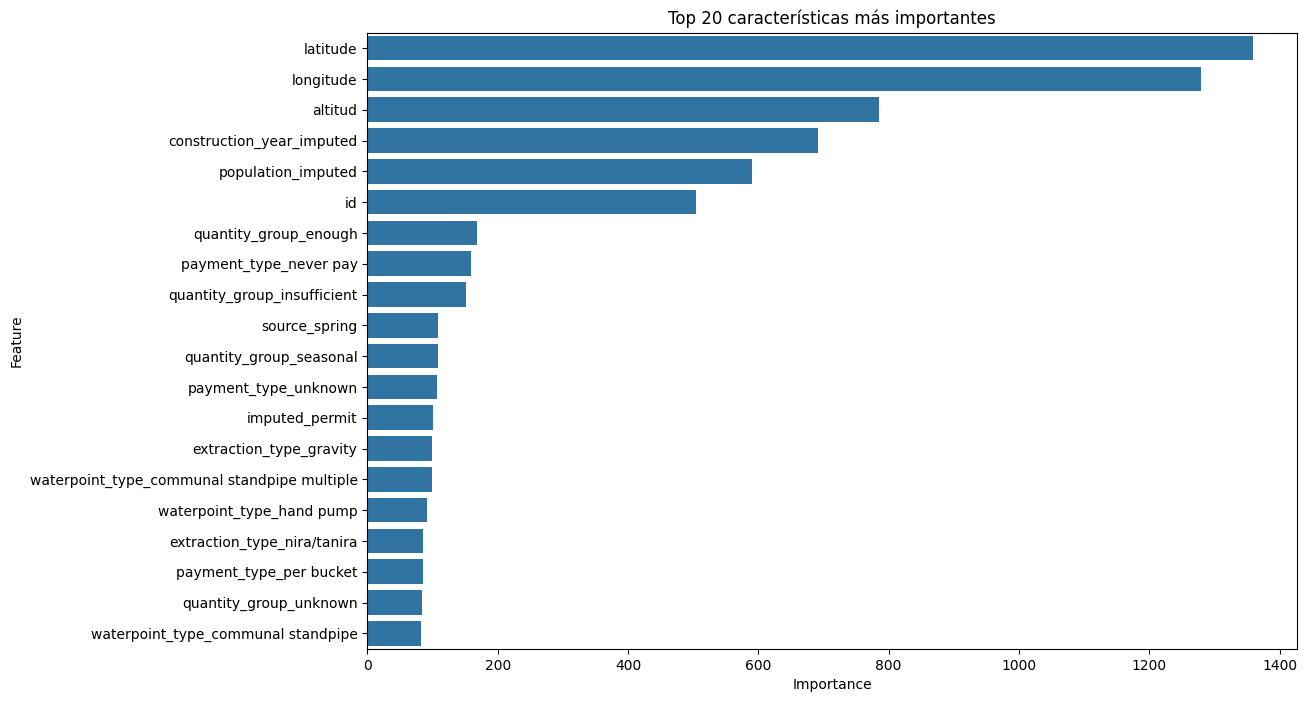

In [23]:
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df.head(20), x='Importance', y='Feature')
plt.title("Top 20 características más importantes")
plt.show()

## 5. Busqueda de hiperparametros

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
# Parámetros para buscar
param_grid = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

In [26]:
# Modelo base
lgb_estimator = lgb.LGBMClassifier(objective='multiclass', num_class=len(le.classes_))

In [27]:
# GridSearchCV
grid = GridSearchCV(estimator=lgb_estimator, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=LGBMClassifier(num_class=3, objective='multiclass'),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [31, 50, 70]},
             scoring='accuracy', verbose=1)

In [28]:
# Mejor modelo y parámetros
print("Mejores parámetros:", grid.best_params_)
print("Mejor puntuación:", grid.best_score_)

Mejores parámetros: {'learning_rate': 0.1, 'n_estimators': 300, 'num_leaves': 70}
Mejor puntuación: 0.7912217412217413


In [29]:
# Evaluación con los mejores parámetros
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Accuracy con mejores parámetros:", accuracy_score(y_test, y_pred_best))

Accuracy con mejores parámetros: 0.7966329966329966


In [30]:
# Predicciones del mejor modelo
y_pred_best = best_model.predict(X_test)

In [39]:
# Guardar el modelo
dump(best_model, 'best_lightgbm_model.joblib')

['best_lightgbm_model.joblib']

In [37]:
# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_best))

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      9724
           1       0.57      0.28      0.37      1293
           2       0.83      0.75      0.79      6803

    accuracy                           0.80     17820
   macro avg       0.73      0.64      0.67     17820
weighted avg       0.79      0.80      0.79     17820



In [32]:
# Métricas específicas
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision (macro):", precision_score(y_test, y_pred_best, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_best, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred_best, average='macro'))

Accuracy: 0.7966329966329966
Precision (macro): 0.7291241503365438
Recall (macro): 0.6426186946519281
F1 Score (macro): 0.6679027249551596


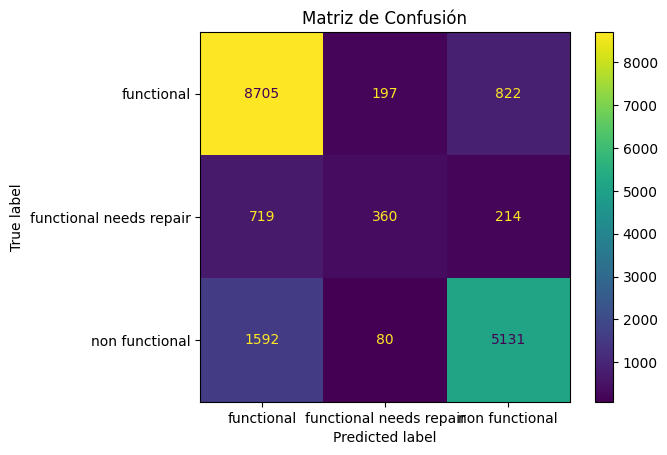

In [35]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=le.classes_)
disp.plot(cmap='viridis', values_format='d')
plt.title("Matriz de Confusión")
plt.show()